In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

In [3]:
mpg_df= pd.read_csv('/content/mpg.csv')
mpg_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [4]:
mpg_df= mpg_df.drop('name', axis=1)
mpg_df['origin']= mpg_df['origin'].replace({1:'america', 2: 'europe', 3:'asia'})
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130,3504,12.0,70,america
1,15.0,8,350.0,165,3693,11.5,70,america
2,18.0,8,318.0,150,3436,11.0,70,america
3,16.0,8,304.0,150,3433,12.0,70,america
4,17.0,8,302.0,140,3449,10.5,70,america


In [5]:
mpg_df= pd.get_dummies(mpg_df, columns=['origin'], drop_first= True)

In [6]:
mpg_df.describe()

,mpg,cylinders,displacement,weight,acceleration,model_year,origin_asia,origin_europe
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,0.198492,0.175879
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.399367,0.381197
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,0.000000,0.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,0.000000,0.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,0.000000,0.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,1.000000,1.000000


In [8]:
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mpg            398 non-null    float64
 1   cylinders      398 non-null    int64  
 2   displacement   398 non-null    float64
 3   horsepower     398 non-null    object 
 4   weight         398 non-null    int64  
 5   acceleration   398 non-null    float64
 6   model_year     398 non-null    int64  
 7   origin_asia    398 non-null    uint8  
 8   origin_europe  398 non-null    uint8  
dtypes: float64(3), int64(3), object(1), uint8(2)
memory usage: 22.7+ KB


In [9]:
mpg_df= mpg_df.replace('?', np.nan)

In [10]:
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mpg            398 non-null    float64
 1   cylinders      398 non-null    int64  
 2   displacement   398 non-null    float64
 3   horsepower     392 non-null    object 
 4   weight         398 non-null    int64  
 5   acceleration   398 non-null    float64
 6   model_year     398 non-null    int64  
 7   origin_asia    398 non-null    uint8  
 8   origin_europe  398 non-null    uint8  
dtypes: float64(3), int64(3), object(1), uint8(2)
memory usage: 22.7+ KB


In [11]:
mpg_df= mpg_df.apply(lambda x:x.fillna(x.median()), axis=0)
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mpg            398 non-null    float64
 1   cylinders      398 non-null    int64  
 2   displacement   398 non-null    float64
 3   horsepower     398 non-null    object 
 4   weight         398 non-null    int64  
 5   acceleration   398 non-null    float64
 6   model_year     398 non-null    int64  
 7   origin_asia    398 non-null    uint8  
 8   origin_europe  398 non-null    uint8  
dtypes: float64(3), int64(3), object(1), uint8(2)
memory usage: 22.7+ KB


In [14]:
mpg_df['horsepower']= pd.to_numeric(mpg_df['horsepower'])

In [15]:
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mpg            398 non-null    float64
 1   cylinders      398 non-null    int64  
 2   displacement   398 non-null    float64
 3   horsepower     398 non-null    float64
 4   weight         398 non-null    int64  
 5   acceleration   398 non-null    float64
 6   model_year     398 non-null    int64  
 7   origin_asia    398 non-null    uint8  
 8   origin_europe  398 non-null    uint8  
dtypes: float64(4), int64(3), uint8(2)
memory usage: 22.7 KB


In [16]:
x= mpg_df.drop('mpg', axis=1)
y= mpg_df[['mpg']]

In [17]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler_x= scaler.fit_transform(x)

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(scaler_x, y, test_size=0.2, random_state= 101)

In [22]:
x_train1= pd.DataFrame(x_train)
x_test1= pd.DataFrame(x_test)

y_train1= pd.DataFrame(y_train)
y_test1= pd.DataFrame(y_test)

Linear **regression**

In [23]:
regression_model= LinearRegression()
regression_model.fit(x_train, y_train)
for idx, col_name in enumerate(x_train1.columns):
    print('The coefficients for {} is {}'.format(col_name, regression_model.coef_[0][idx]))

The coefficients for 0 is -1.1243443269454323
The coefficients for 1 is 3.3142081024390975
The coefficients for 2 is -0.7152927226834366
The coefficients for 3 is -6.127326021860851
The coefficients for 4 is 0.2259548237952739
The coefficients for 5 is 3.011407844042232
The coefficients for 6 is 0.9634826603829773
The coefficients for 7 is 1.0520300835451197


In [24]:
regression_model.intercept_

array([23.61437178])

In [25]:
regression_model.coef_

array([[-1.12434433,  3.3142081 , -0.71529272, -6.12732602,  0.22595482,
         3.01140784,  0.96348266,  1.05203008]])

**Ridge**

In [26]:
ridge= Ridge(alpha=0.3)
ridge.fit(x_train, y_train)

Ridge(alpha=0.3)

In [27]:
ridge.coef_

array([[-1.08823864,  3.17999328, -0.73064569, -6.03357927,  0.20468883,
         3.00269998,  0.95661803,  1.03909364]])

In [28]:
ridge.intercept_

array([23.6136573])

**Lasso**

In [29]:
lasso= Lasso(alpha=0.3)
lasso.fit(x_train, y_train)

Lasso(alpha=0.3)

In [30]:
lasso.coef_

array([-0.        , -0.        , -0.16755815, -4.90909374,  0.        ,
        2.6957798 ,  0.31820898,  0.3261403 ])

In [31]:
lasso.intercept_

array([23.60092699])

In [32]:
print(lasso.score(x_train, y_train))
print(lasso.score(x_test, y_test))

0.815970796448738
0.7958670999383077


In [33]:
print(ridge.score(x_train, y_train))
print(ridge.score(x_test, y_test))

0.8283720747227749
0.7992709055928313


In [34]:
print(regression_model.score(x_train, y_train))
print(regression_model.score(x_test, y_test))

0.8283884873846112
0.7984664742588541


**DNN**

In [37]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from mlxtend.plotting import plot_decision_regions

In [38]:
from sklearn.datasets import make_moons

In [39]:
x,y= make_moons(100, noise=0.25, random_state=2)

In [40]:
y

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0])

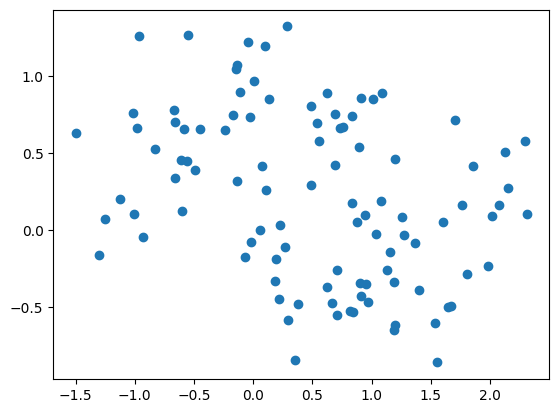

In [41]:
plt.scatter(x[:,0], x[:,1])
plt.show()

In [42]:
model= Sequential()
model.add(Dense(128, input_dim=2, activation= 'relu'))
model.add(Dense(128, activation= 'relu'))
model.add(Dense(1, activation= 'sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               384       
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17,025
Trainable params: 17,025
Non-trainable params: 0
_________________________________________________________________


In [46]:
adam= Adam(learning_rate= 0.01)
model.compile(loss= 'binary_crossentropy', optimizer= adam, metrics= ['accuracy'])
history= model.fit(x,y, epochs= 2000, validation_split= 0.2, verbose=0)

9600/9600 [==============================] - 15s 2ms/step


TypeError: ignored

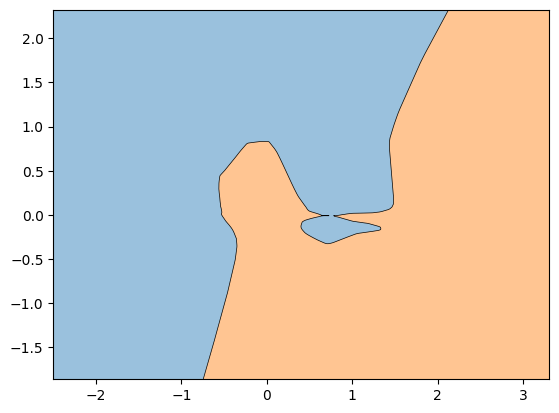

In [47]:
plot_decision_regions(x,y.astype('int'), clf=model, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

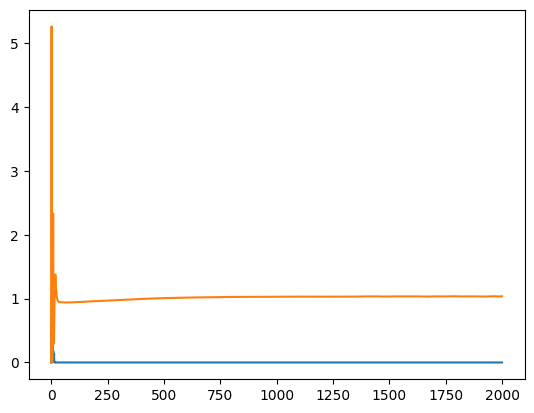

In [48]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [50]:
model1= Sequential()
model1.add(Dense(128, input_dim=2, activation= 'relu', kernel_regularizer= tf.keras.regularizers.l2(0.01)))
model1.add(Dense(128, activation= 'relu'))
model1.add(Dense(1, activation= 'sigmoid'))
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               384       
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17,025
Trainable params: 17,025
Non-trainable params: 0
_________________________________________________________________


In [51]:
adam= Adam(learning_rate= 0.01)
model1.compile(loss= 'binary_crossentropy', optimizer= adam, metrics= ['accuracy'])
history= model1.fit(x,y, epochs= 2000, validation_split= 0.2, verbose=0)

9600/9600 [==============================] - 15s 2ms/step


TypeError: ignored

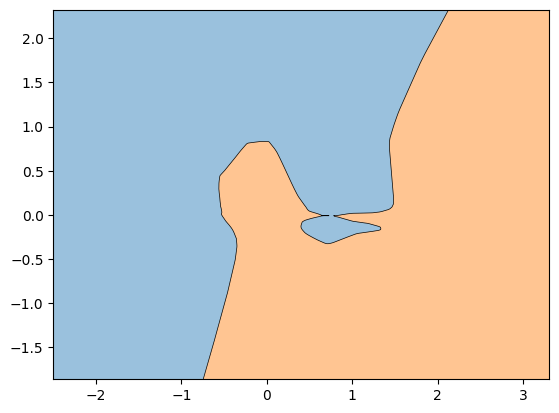

In [52]:
plot_decision_regions(x,y.astype('int'), clf=model, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

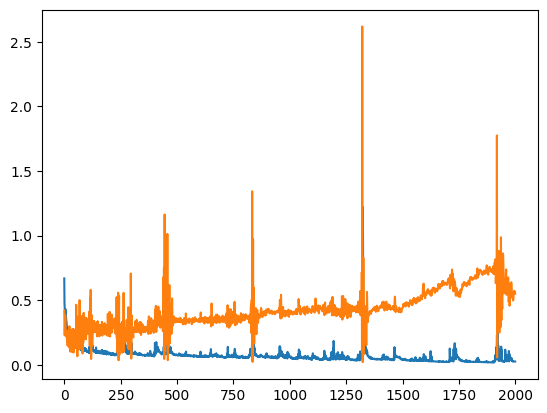

In [53]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])